In [1]:
%%capture
!sudo apt -qq install git-lfs
!git config --global credential.helper store

In [2]:
 ! pip install -q kaggle
 from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jayanthmohan","key":"11c543b5c0eda329cb1547d964bf624d"}'}

In [4]:
 ! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d jayanthmohan/raw-paper

 99% 1.00G/1.01G [00:15<00:00, 77.6MB/s]
100% 1.01G/1.01G [00:15<00:00, 69.2MB/s]


In [7]:
import zipfile
import os

# Specify the path to the ZIP file and the target folder
zip_file_path = '/content/raw-paper.zip'
target_folder = '/content/kaggle/'

# Create the target folder if it doesn't exist
os.makedirs(target_folder, exist_ok=True)

# Unzip the contents of the ZIP file into the target folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(target_folder)

print(f"Contents of {zip_file_path} have been extracted to {target_folder}")


Contents of /content/raw-paper.zip have been extracted to /content/kaggle/


In [1]:
!pip install timm fastai
! pip install -U accelerate
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from fastai.vision.all import *
from fastai import *
import timm
from fastai.vision.all import *
import timm
from fastai.distributed import *
import warnings
warnings.simplefilter("ignore")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 4.6 MB/s eta 0:00:00


In [ ]:
def random_seed(seed_value, use_cuda):
    np.random.seed(seed_value) # cpu vars
    torch.manual_seed(seed_value) # cpu  vars
    random.seed(seed_value) # Python
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    if use_cuda:
        torch.cuda.manual_seed(seed_value)
        torch.cuda.manual_seed_all(seed_value) # gpu vars
        torch.backends.cudnn.deterministic = True  #needed
        torch.backends.cudnn.benchmark = False

random_seed(42, True)

In [ ]:
path = r'/content/kaggle'
bs = 32
sz = 224

# Define data augmentation transforms

data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    item_tfms=Resize(sz),
    splitter=GrandparentSplitter(train_name="train", valid_name="test"),
    batch_tfms = aug_transforms(do_flip=True, flip_vert=True, max_rotate=120.0, min_zoom=1.0, max_zoom=1.1, max_lighting=0.3, size=sz))
#   batch_tfms = aug_transforms(mult=1.0, do_flip=True, flip_vert=True, max_rotate=120.0, min_zoom=1.0, max_zoom=1.1, max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75, xtra_tfms=None, size=sz, mode='bilinear', pad_mode='reflection', align_corners=True, batch=False, min_scale=1.0)
# )

In [ ]:
dls = data.dataloaders(path, bs=bs)
print("Number of classes: ",dls.c)

Number of classes:  31


In [ ]:
# Total number of train samples
train_samples = len(dls.train_ds)

# Total number of test samples
test_samples = len(dls.valid_ds)

print(f"Total train samples: {train_samples}")
print(f"Total test samples: {test_samples}")

Total train samples: 39160
Total test samples: 994


In [ ]:
arch = "swin_base_patch4_window7_224"
model = timm.create_model(arch, pretrained=True, in_chans=3, num_classes=dls.c)
#model.head.fc = nn.Sequential(create_cls_module(nf=model.num_features, n_out=dls.c))

In [ ]:
savedfilename = f'{path}_{arch}_opti_unaugmented'
learn = Learner(dls, model, metrics=[accuracy,Precision(average='macro'), Recall(average='macro'), F1Score(average='macro')],  cbs=[CSVLogger(fname=savedfilename+'.csv', append=True),
                         SaveModelCallback(monitor='valid_loss', comp=None, min_delta=0.0, fname=savedfilename, every_epoch=False, with_opt=False, reset_on_fit=True)])

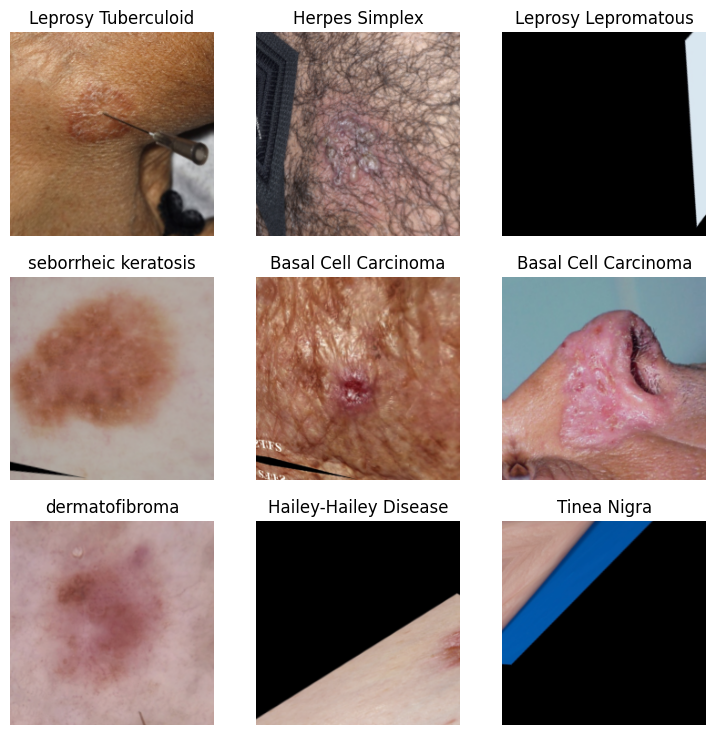

In [ ]:
dls.show_batch()

In [ ]:
learn.summary()

SwinTransformer (Input shape: 32 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 128 x 56 x 56  
Conv2d                                    6272       True      
LayerNorm                                 256        True      
Identity                                                       
LayerNorm                                 256        True      
____________________________________________________________________________
                     32 x 49 x 384       
Linear                                    49536      True      
Dropout                                                        
Linear                                    16512      True      
Dropout                                                        
Softmax                                                        
Identity                                                       
LayerNorm                                 256        True      
_____________________

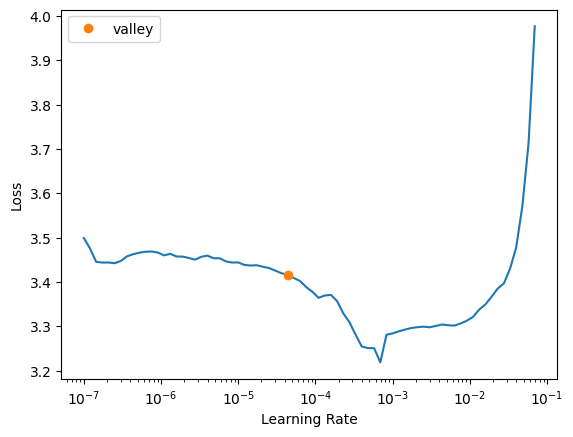

In [ ]:
lr = learn.lr_find()

In [ ]:
learn.fit(10, lr)

Better model found at epoch 0 with valid_loss value: 0.6026270389556885.
Better model found at epoch 1 with valid_loss value: 0.43880754709243774.


In [11]:
!unzip /content/qwerty.zip

Archive:  /content/qwerty.zip
   creating: ShapTest_new/test/
   creating: ShapTest_new/test/actinic keratosis/
  inflating: ShapTest_new/test/actinic keratosis/ISIC_0024763.jpg  
   creating: ShapTest_new/test/Basal Cell Carcinoma/
  inflating: ShapTest_new/test/Basal Cell Carcinoma/511.jpg  
   creating: ShapTest_new/test/Darier_s Disease/
  inflating: ShapTest_new/test/Darier_s Disease/1294.jpg  
   creating: ShapTest_new/test/Epidermolysis Bullosa Pruriginosa/
  inflating: ShapTest_new/test/Epidermolysis Bullosa Pruriginosa/9796.jpg  
   creating: ShapTest_new/test/Larva Migrans/
  inflating: ShapTest_new/test/Larva Migrans/3185.jpg  
   creating: ShapTest_new/test/Molluscum Contagiosum/
  inflating: ShapTest_new/test/Molluscum Contagiosum/img_113.jpg  
   creating: ShapTest_new/test/nevus/
  inflating: ShapTest_new/test/nevus/ISIC_0000532.jpg  
   creating: ShapTest_new/test/pigmented benign keratosis/
  inflating: ShapTest_new/test/pigmented benign keratosis/ISIC_0027771.jpg  
  

In [12]:
path = "/content/ShapTest_new"
bs = 12
sz = 224

data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y= parent_label,
    splitter= GrandparentSplitter(train_name = "train",valid_name = "test"),
    item_tfms=Resize(224))
    #batch_tfms=aug_transforms(size=224, min_scale=0.75))

dls = data.dataloaders(path, bs=bs,seed = 42,shuffle = True)
print("Number of classes: ",dls.c)

del data

Number of classes:  12


In [13]:
# pull a sample of our data (128 images)
batch = dls.one_batch()

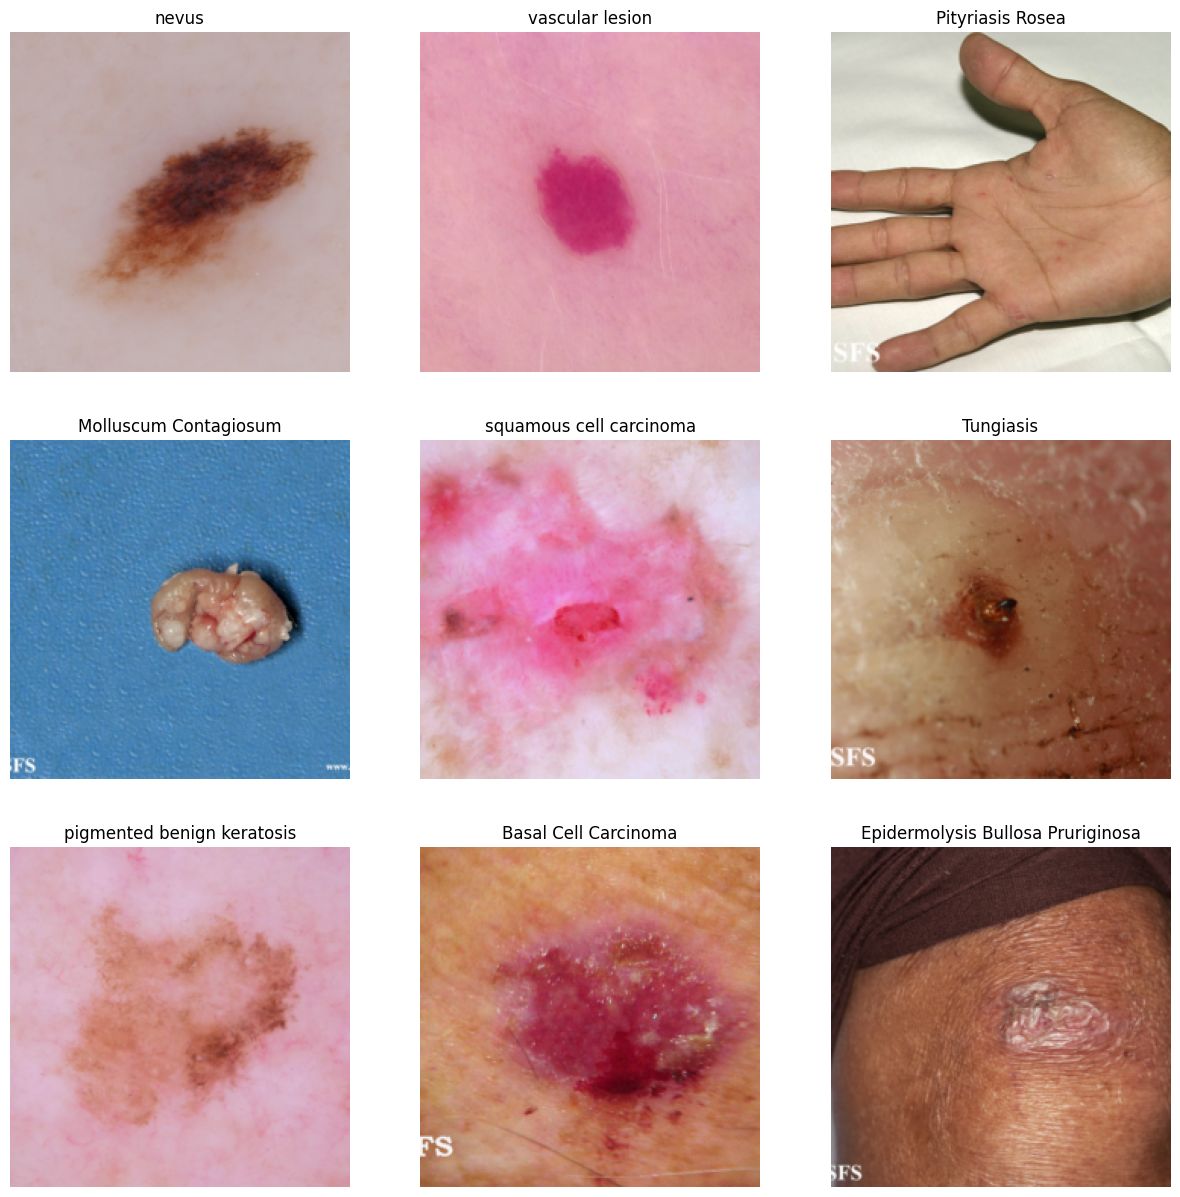

In [14]:
# Visualize the batch
dls.show_batch(b=batch, figsize=(15, 15))

In [15]:
arch = "swin_base_patch4_window7_224"
model = timm.create_model(arch, pretrained=False, in_chans=3, num_classes=31)
learn = Learner(dls, model, metrics=[accuracy,Precision(average='macro'), Recall(average='macro'), F1Score(average='macro')])
learn.load("/content/drive/MyDrive/Weights/swin_timm_aug")

In [16]:
preds = learn.get_preds()
pred_class = preds[0].max(1).indices
tgts = preds[1]

for i, name in enumerate(dls.train.vocab):
    idx = torch.nonzero(tgts==i)
    subset = (tgts == pred_class)[idx]
    acc = subset.squeeze().float().mean()
    print(f'{name}: {acc:.1%}')

Basal Cell Carcinoma: 100.0%
Darier_s Disease: 100.0%
Epidermolysis Bullosa Pruriginosa: 0.0%
Larva Migrans: 0.0%
Molluscum Contagiosum: 0.0%
Pityriasis Rosea: 0.0%
Tungiasis: 0.0%
actinic keratosis: 0.0%
nevus: 0.0%
pigmented benign keratosis: 0.0%
squamous cell carcinoma: 0.0%
vascular lesion: 0.0%


In [17]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 6.1 MB/s eta 0:00:00


In [18]:
import shap

In [19]:
# specify how many images to use when creating the background distribution
num_samples = 6
explainer = shap.GradientExplainer(
    learn.model, batch[0][:num_samples]
)

# calculate shapely values
shap_values = explainer.shap_values(
    batch[0][num_samples:]
)

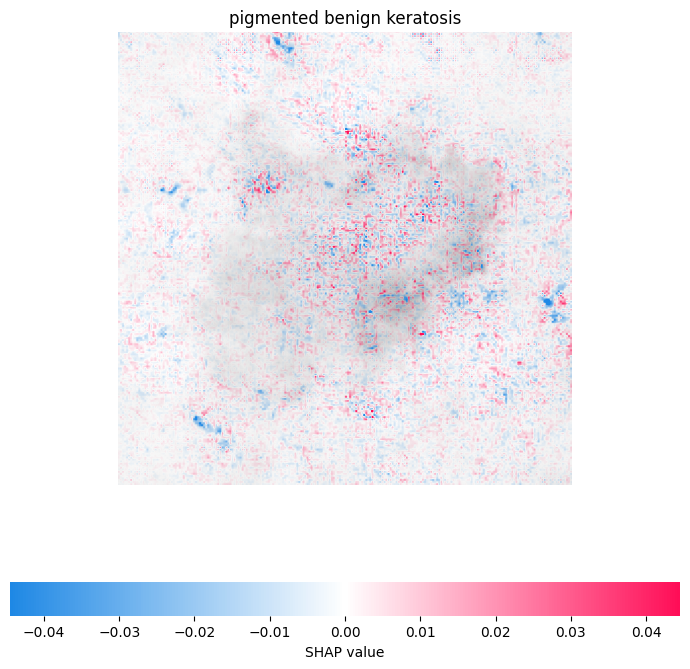

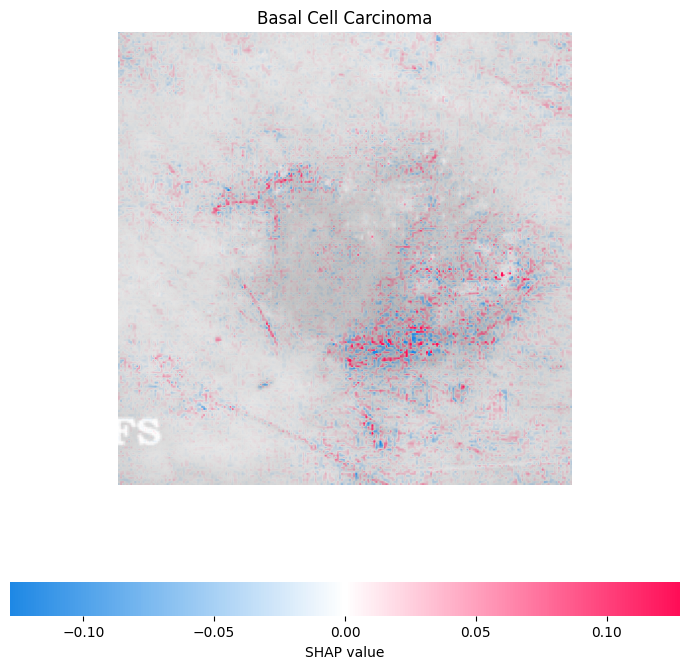

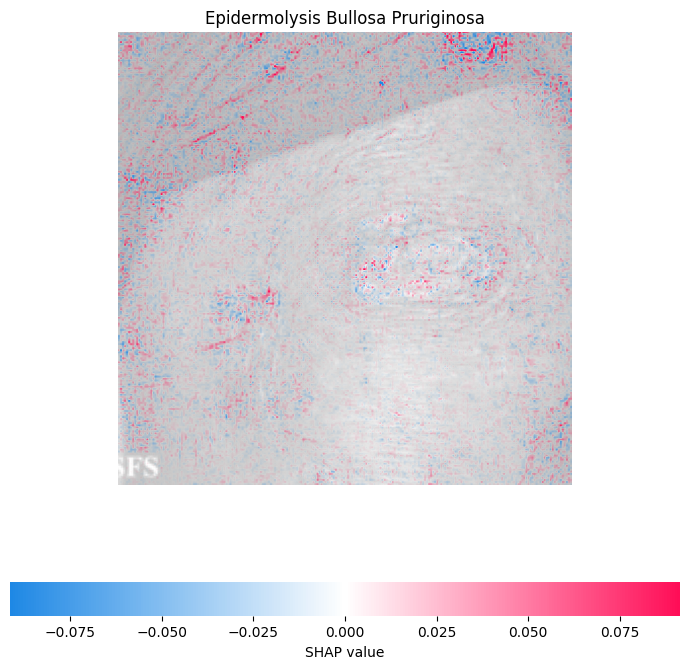

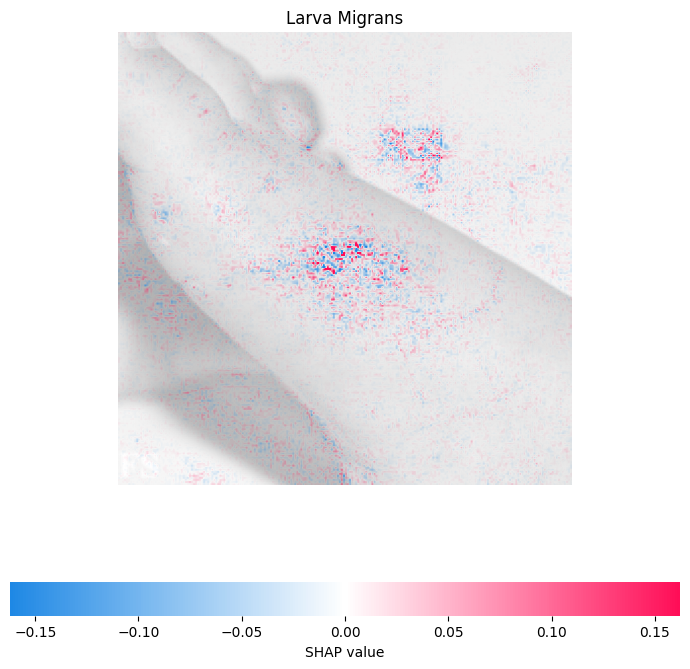

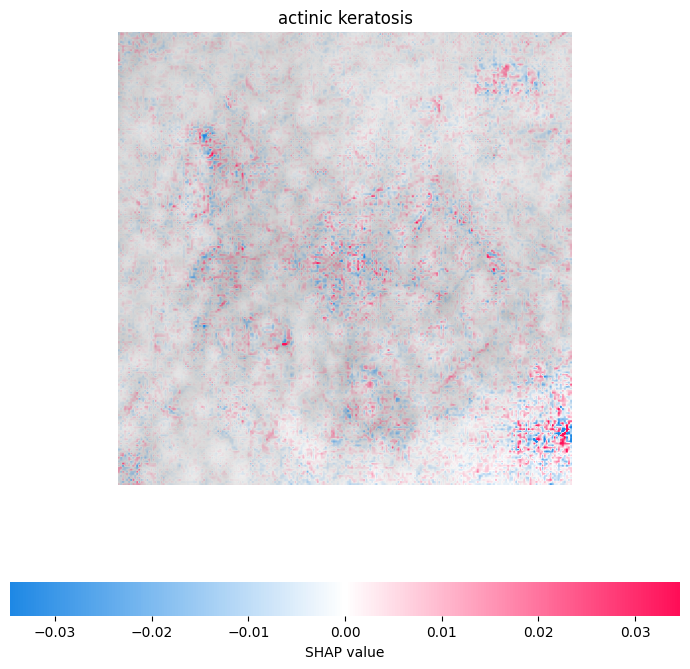

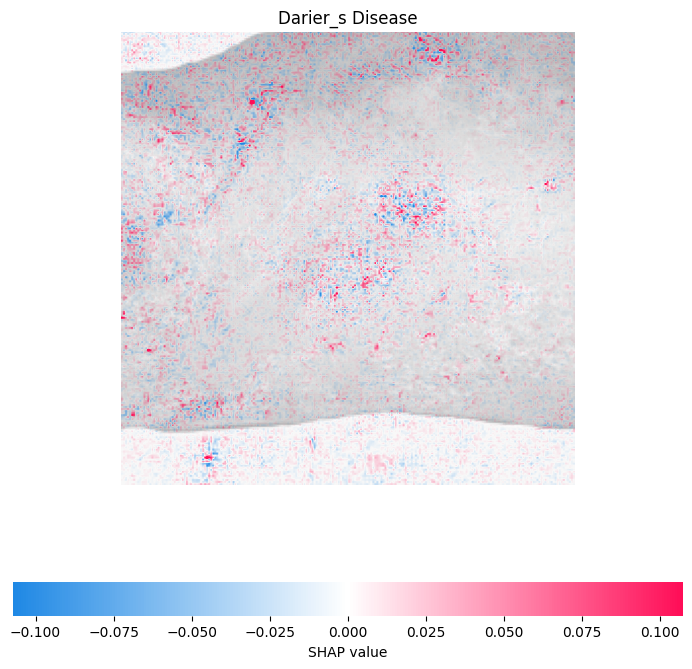

In [20]:
import matplotlib.pyplot as pl
from shap.plots import colors

for idx, x in enumerate(batch[0][num_samples:]):
    label = dls.train.vocab[batch[1][num_samples:]][idx]
    sv_idx = list(dls.train.vocab).index(label)

    # plot our explanations
    fig, axes = pl.subplots(figsize=(7, 7))

    # make sure we have a 2D array for grayscale
    if len(x.shape) == 3 and x.shape[2] == 1:
        x = x.reshape(x.shape[:2])
    if x.max() > 1:
        x /= 255.

    # get a grayscale version of the image
    x_curr_gray = (
        0.2989 * x[0,:,:] +
        0.5870 * x[1,:,:] +
        0.1140 * x[2,:,:]
    )
    x_curr_disp = x

    abs_vals = np.stack(
        [np.abs(shap_values[sv_idx][idx].sum(0))], 0
    ).flatten()
    max_val = np.nanpercentile(abs_vals, 99.9)

    label_kwargs = {'fontsize': 12}
    axes.set_title(label, **label_kwargs)

    sv = shap_values[sv_idx][idx].sum(0)
    axes.imshow(
        x_curr_gray.cpu(),
        cmap=pl.get_cmap('gray'),
        alpha=0.3,
        extent=(-1, sv.shape[1], sv.shape[0], -1)
    )
    im = axes.imshow(
        sv,
        cmap=colors.red_transparent_blue,
        vmin=-max_val,
        vmax=max_val
    )
    axes.axis('off')

    fig.tight_layout()

    cb = fig.colorbar(
        im,
        ax=np.ravel(axes).tolist(),
        label="SHAP value",
        orientation="horizontal"
    )
    cb.outline.set_visible(False)
    pl.show()